# Import Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [ ]:
ss = pd.read_excel('/content/sample_data/SuperStore.xlsx')
ss.head()

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub-Category,Product_Name,Order_Date,Ship_Date,Ship_Mode,Customer_Name,Segment,Country/Region,City,State,Region
0,CA-2019-152156,CG-12520,42420,FUR-BO-10001798,261.9600,2,0.00,41.9136,Furniture,Bookcases,Bush Somerset Collection Bookcase,2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
1,CA-2019-152156,CG-12520,42420,FUR-CH-10000454,731.9400,3,0.00,219.5820,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2019-11-08,2019-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,South
2,CA-2019-138688,DV-13045,90036,OFF-LA-10000240,14.6200,2,0.00,6.8714,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2019-06-12,2019-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,West
3,US-2018-108966,SO-20335,33311,FUR-TA-10000577,957.5775,5,0.45,-383.0310,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South
4,US-2018-108966,SO-20335,33311,OFF-ST-10000760,22.3680,2,0.20,2.5164,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2018-10-11,2018-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South


# Summarize Data

In [ ]:
sum_category = pd.pivot_table(
    data = ss,
    index='Category',
    values='Sales',
    aggfunc='sum')
sum_category

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


In [ ]:
sum_cat_sku = pd.pivot_table(
    data = ss,
    index=['Category', 'Sub-Category', 'Product_Name'],
    values='Sales',
    aggfunc='sum')
sum_cat_sku

Sales
Category   Sub-Category Product_Name                                                 
Furniture  Bookcases    Atlantic Metals Mobile 2-Shelf Bookcases, Custo...   400.0268
                        Atlantic Metals Mobile 3-Shelf Bookcases, Custo...  7539.7122
                        Atlantic Metals Mobile 4-Shelf Bookcases, Custo...  5184.0810
                        Atlantic Metals Mobile 5-Shelf Bookcases, Custo...  5492.8850
                        Bestar Classic Bookcase                             1897.8102
...                                                                               ...
Technology Phones       iKross Bluetooth Portable Keyboard + Cell Phone...   477.6600
                        iOttie HLCRIO102 Car Mount                           215.8920
                        iOttie XL Car Mount                                  223.8880
                        invisibleSHIELD by ZAGG Smudge-Free Screen Prot...   442.5540
                        netTALK DUO VoIP Telephone Service                  1112.7880

[1817 rows x 1 columns]

In [ ]:
#sum_cat_sku.reset_index(inplace=True)
sum_cat_sku.reset_index()

,Category,Sub-Category,Product_Name,Sales
0,Furniture,Bookcases,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",400.0268
1,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",7539.7122
2,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",5184.0810
3,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",5492.8850
4,Furniture,Bookcases,Bestar Classic Bookcase,1897.8102
...,...,...,...,...
1812,Technology,Phones,iKross Bluetooth Portable Keyboard + Cell Phon...,477.6600
1813,Technology,Phones,iOttie HLCRIO102 Car Mount,215.8920
1814,Technology,Phones,iOttie XL Car Mount,223.8880
1815,Technology,Phones,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.5540


In [ ]:
popular_products = pd.pivot_table(
    data = ss,
    index='Product_Name',
    values='Order_ID',
    aggfunc='count').sort_values(by='Order_ID', ascending=False)
popular_products

,Order_ID
Product_Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
...,...
Xerox 1984,1
SanDisk Cruzer 8 GB USB Flash Drive,1
Xerox 20,1


# Bar Plot

<Axes: xlabel='Product_Name'>

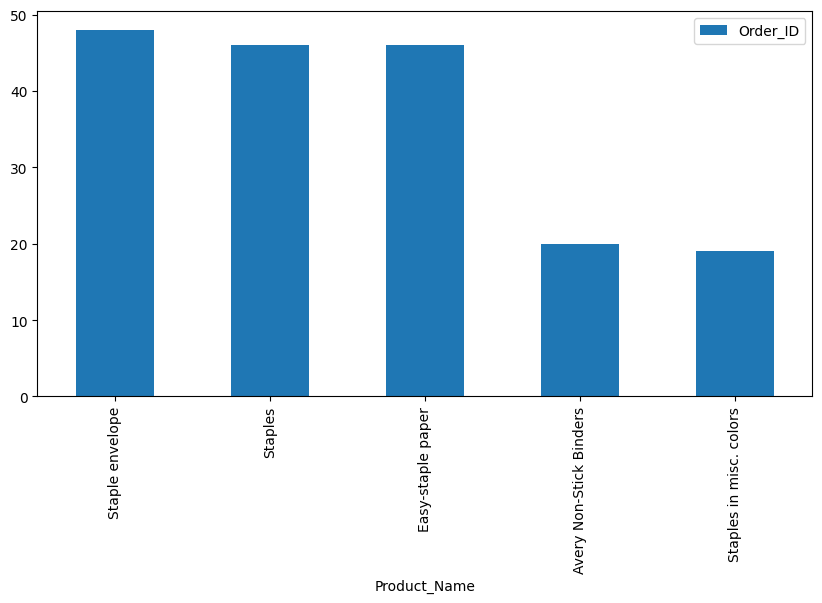

In [ ]:
popular_products.head().plot(kind= 'bar', figsize = (10,5))

In [ ]:
market_share = pd.pivot_table(
    data = ss,
    index='Category',
    columns='Region',
    values='Sales',
    aggfunc='sum')
market_share

Region,Central,East,South,West
Category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320


<Axes: xlabel='Category'>

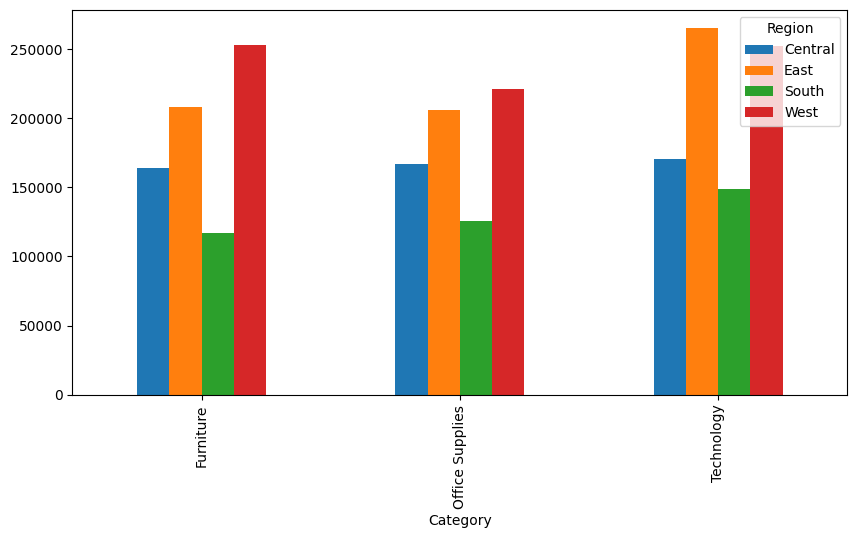

In [ ]:
market_share.plot(kind='bar', figsize=(10,5))

<Axes: xlabel='Category'>

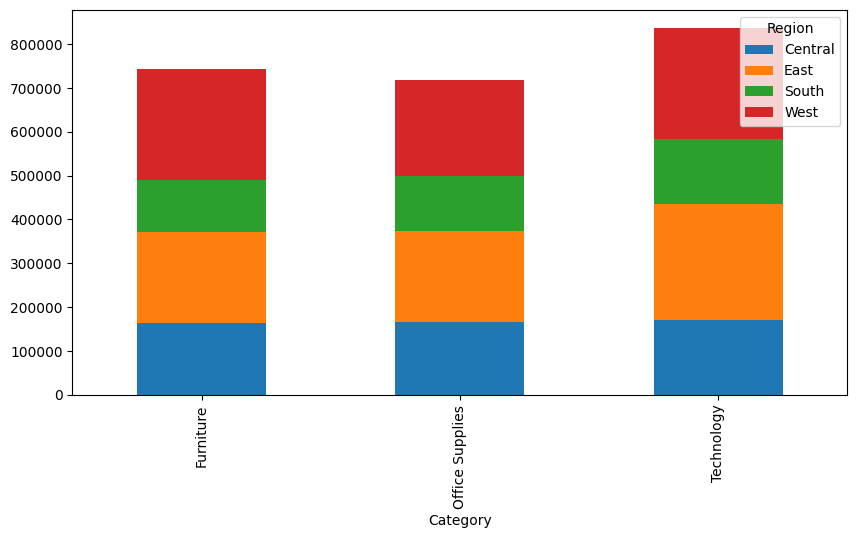

In [ ]:
market_share.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
market_share = market_share.unstack().reset_index()
market_share.columns = ['Category', 'Region', 'Sales']
market_share

,Category,Region,Sales
0,Central,Furniture,163797.1638
1,Central,Office Supplies,167026.4150
2,Central,Technology,170416.3120
3,East,Furniture,208291.2040
4,East,Office Supplies,205516.0550
5,East,Technology,264973.9810
6,South,Furniture,117298.6840
7,South,Office Supplies,125651.3130
8,South,Technology,148771.9080
9,West,Furniture,252612.7435


<Axes: xlabel='Region', ylabel='Sales'>

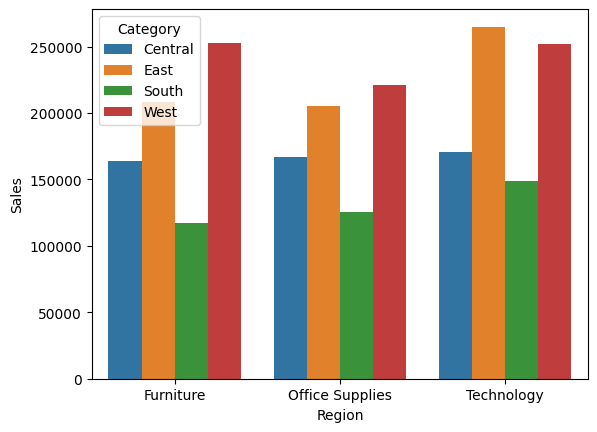

In [ ]:
sns.barplot(data=market_share, x='Region', y='Sales', hue='Category')

# Line Chart

In [ ]:
data = pd.pivot_table(
    data = ss,
    index=['Order_Date', 'Category'],
    values='Sales',
    aggfunc='sum').reset_index()
data.head()

,Order_Date,Category,Sales
0,2017-01-03,Office Supplies,16.448
1,2017-01-04,Office Supplies,288.060
2,2017-01-05,Office Supplies,19.536
3,2017-01-06,Furniture,2573.820
4,2017-01-06,Office Supplies,685.340


<Axes: xlabel='Order_Date'>

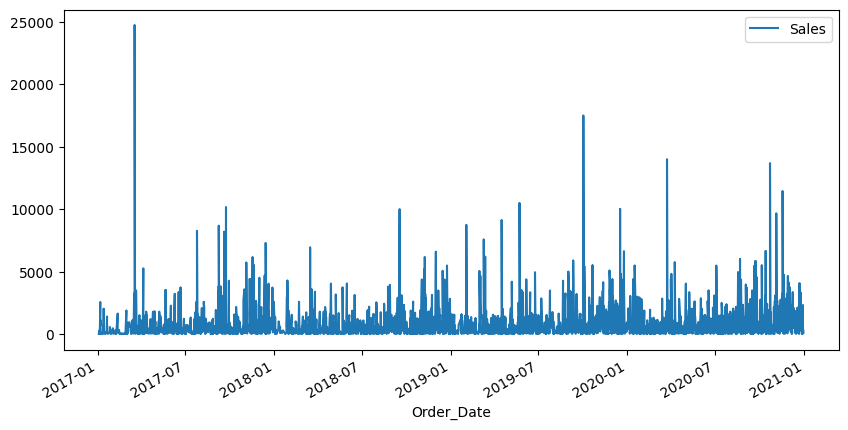

In [ ]:
data.plot(x='Order_Date', y='Sales', kind='line', figsize=(10,5))

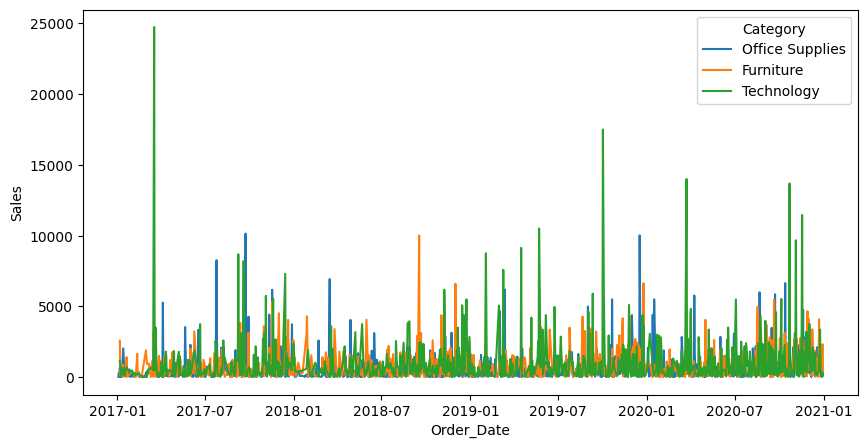

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='Order_Date', y='Sales', hue='Category')
plt.show()

# Scatterplot

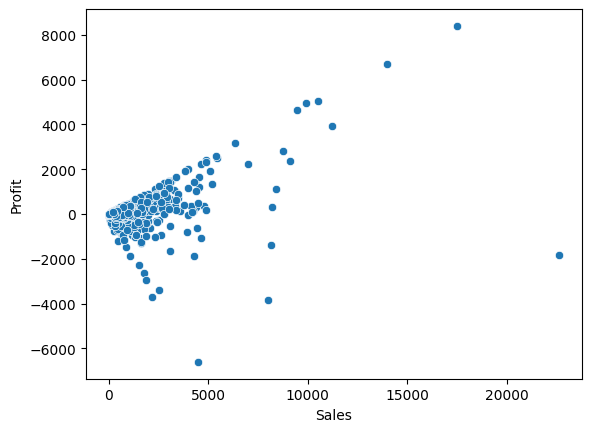

In [ ]:
sns.scatterplot(data=ss, x='Sales', y='Profit')
plt.show()

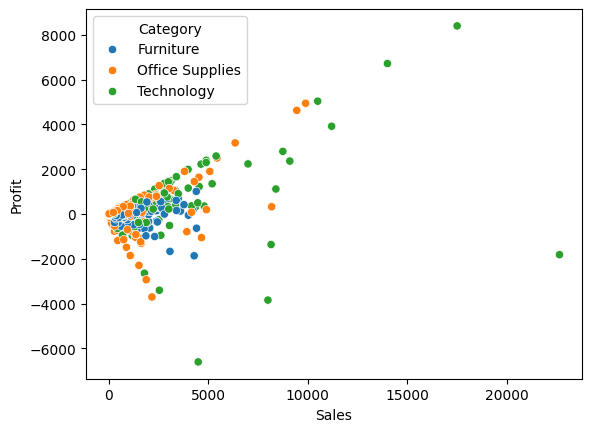

In [ ]:
sns.scatterplot(data=ss, x='Sales', y='Profit', hue='Category')
plt.show()

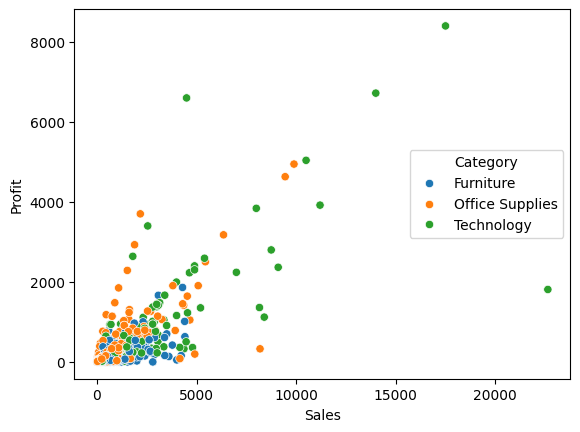

In [ ]:
ss['Profit'] = ss['Profit'].abs()
sns.scatterplot(data=ss, x='Sales', y='Profit', hue='Category')
plt.show()

# Distplot

<ipython-input-32-a051cbd57fae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss['Sales'], kde=True, hist=True)


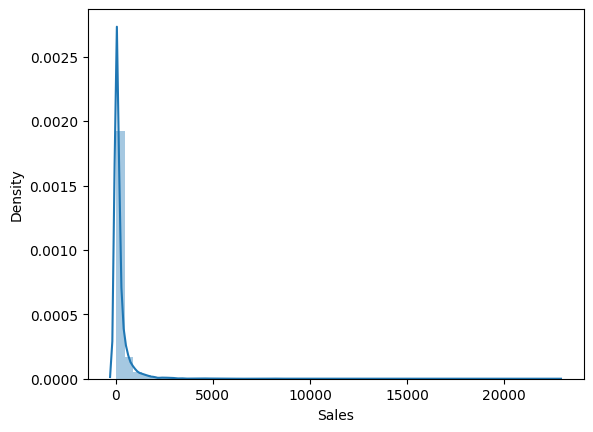

In [ ]:
sns.distplot(ss['Sales'], kde=True, hist=True)
plt.show()

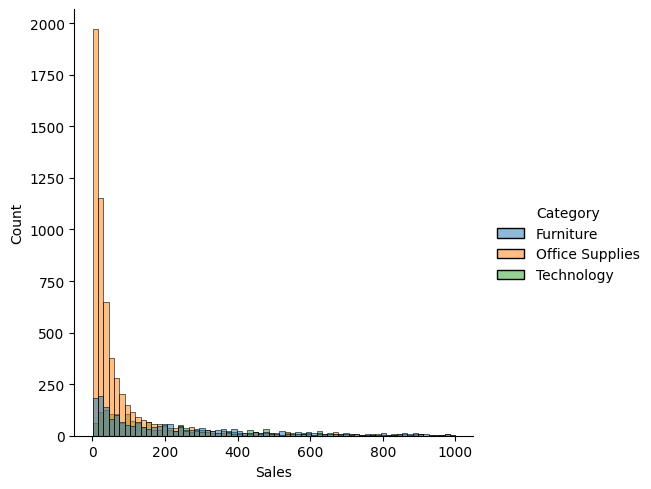

In [ ]:
sns.displot(data = ss[ss['Sales'] <=1000], x='Sales', hue='Category')
plt.show()

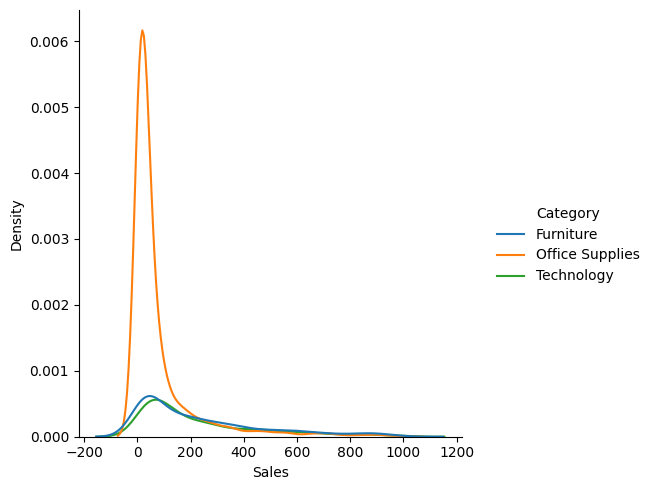

In [ ]:
sns.displot(data = ss[ss['Sales'] <=1000], x='Sales', hue='Category', kind='kde')
plt.show()

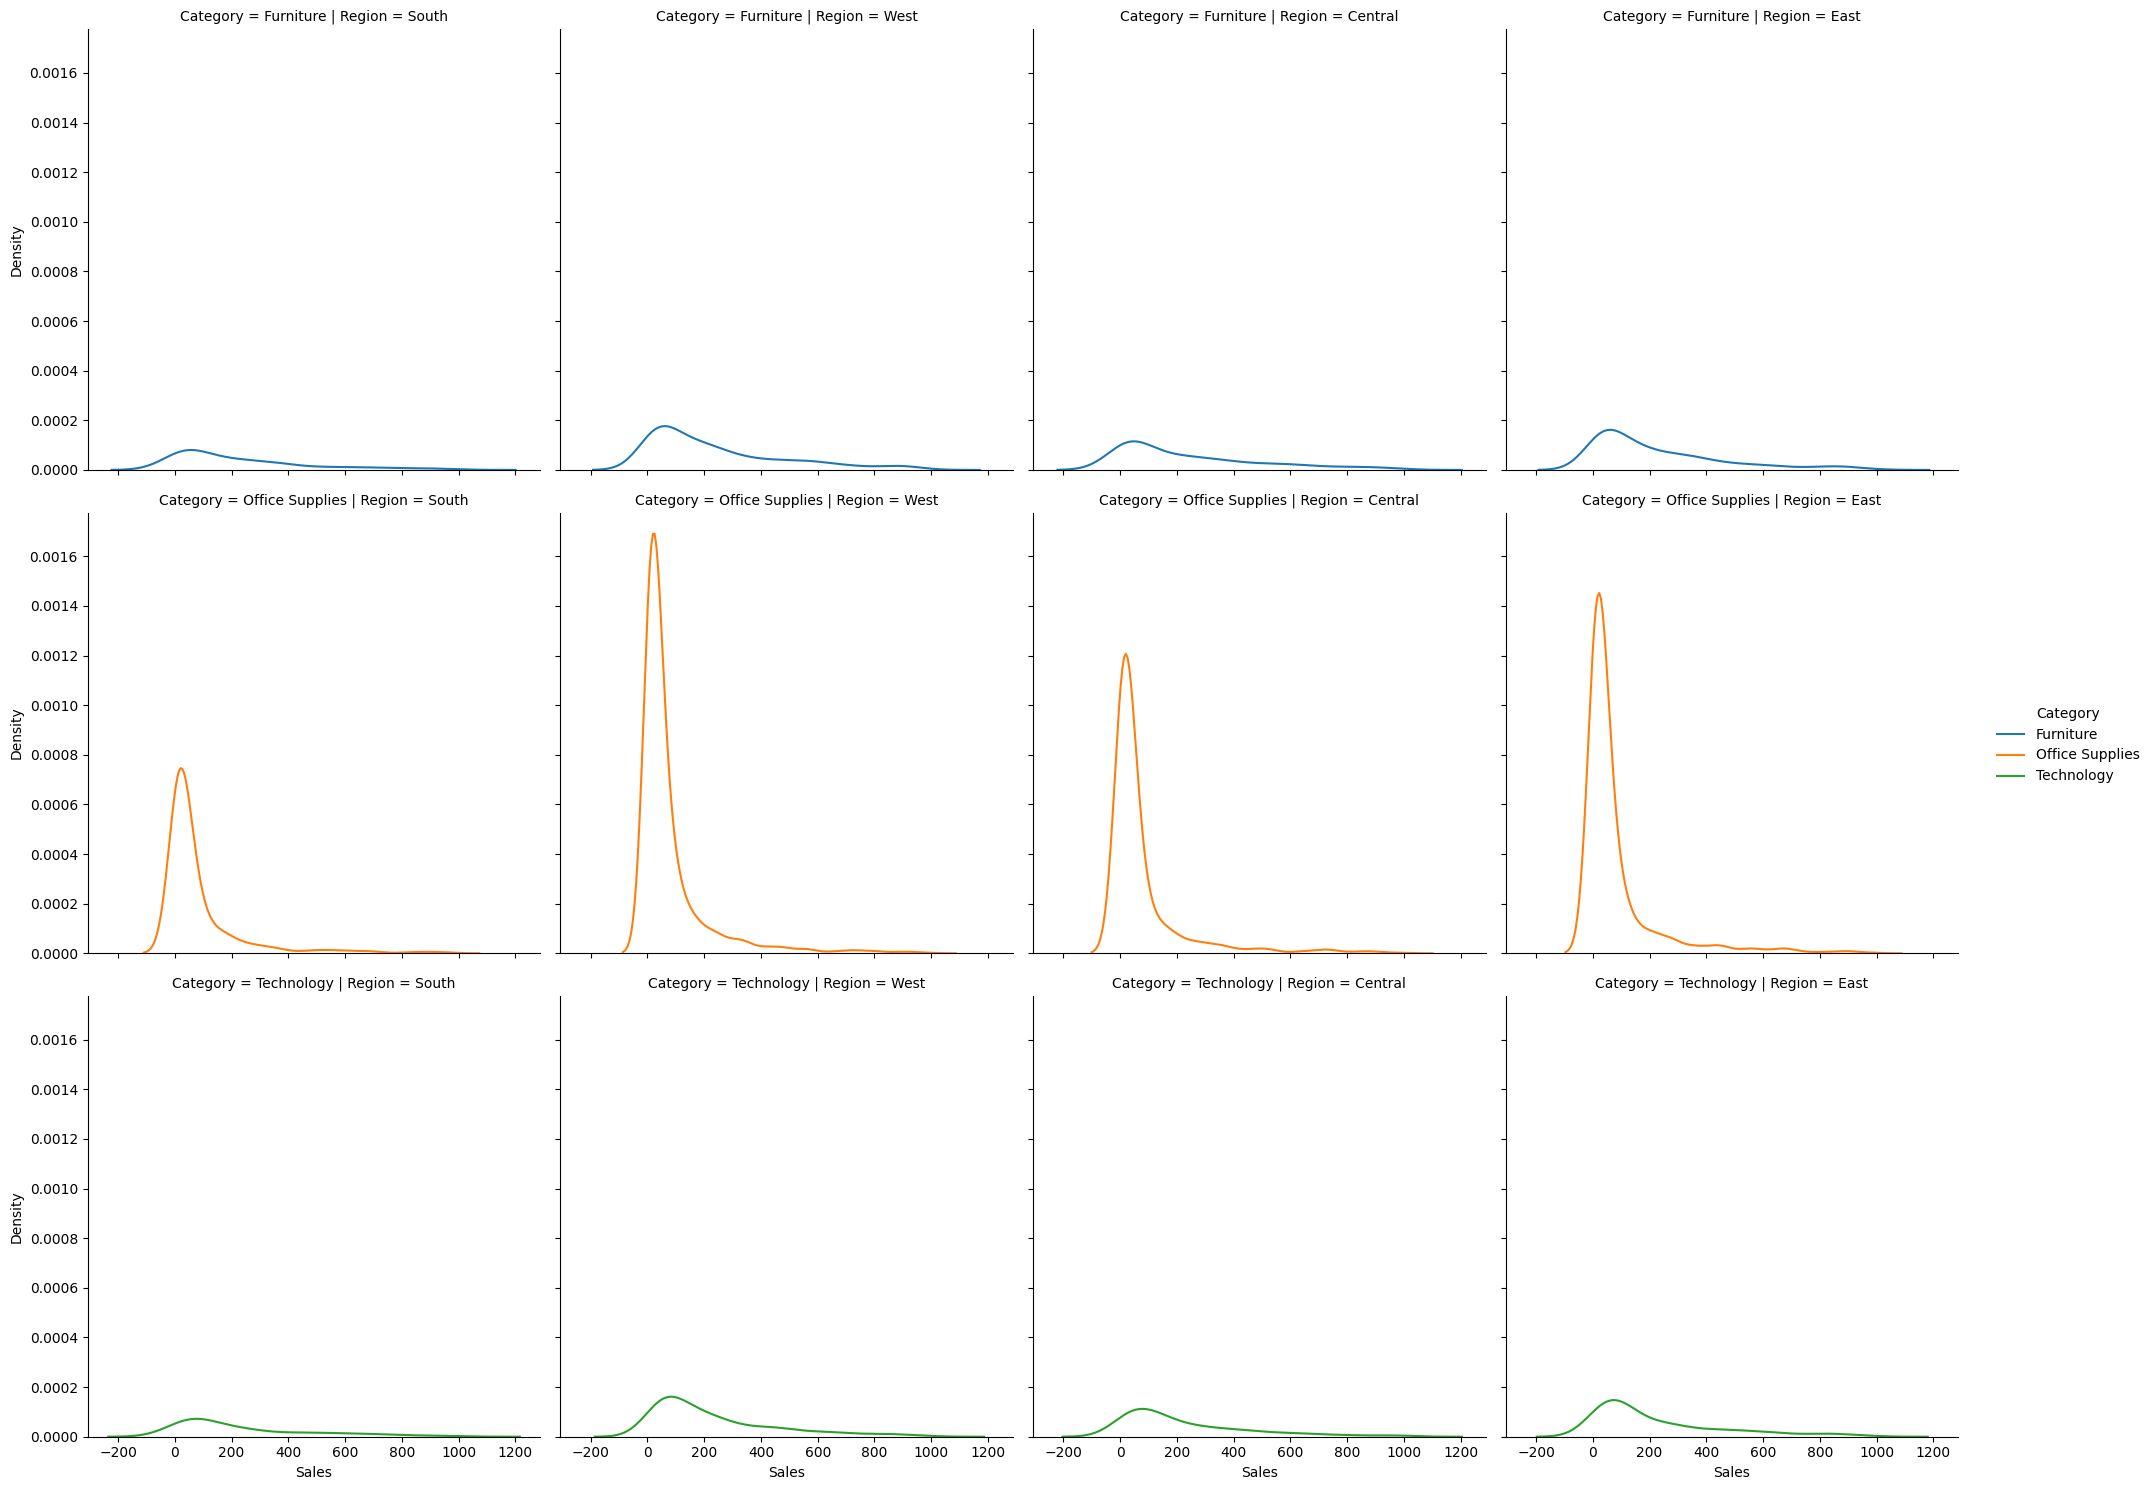

In [ ]:
sns.displot(data = ss[ss['Sales'] <=1000], x='Sales', col='Region', row='Category',hue='Category', kind='kde')
plt.show()

# Heatmap

In [ ]:
data = pd.pivot_table(
    data = ss,
    index='State',
    columns='Category',
    values='Sales',
    aggfunc='sum')
data

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,6332.4800,4209.080,8969.080
Arizona,13525.2910,10005.825,11750.885
Arkansas,3187.5500,4565.330,3925.250
California,156064.6015,142351.948,159271.082
Colorado,13243.0370,7898.752,10966.329
Connecticut,5174.9870,5418.340,2791.030
Delaware,4759.3190,8129.530,14562.220
District of Columbia,1346.5800,138.520,1379.920
Florida,22987.0380,19518.634,46968.036


<Axes: xlabel='Category', ylabel='State'>

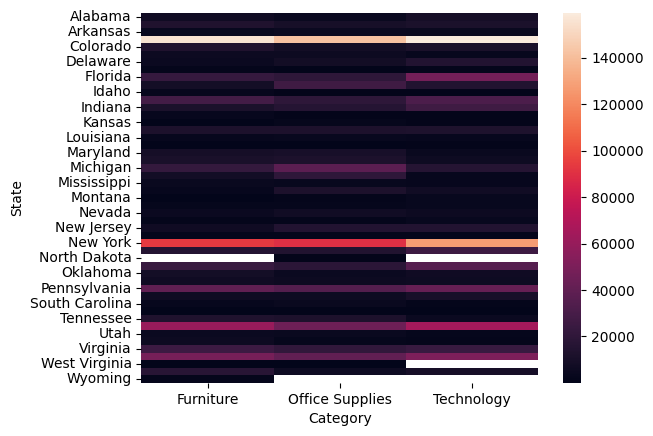

In [ ]:
sns.heatmap(data)

<Axes: xlabel='Category', ylabel='State'>

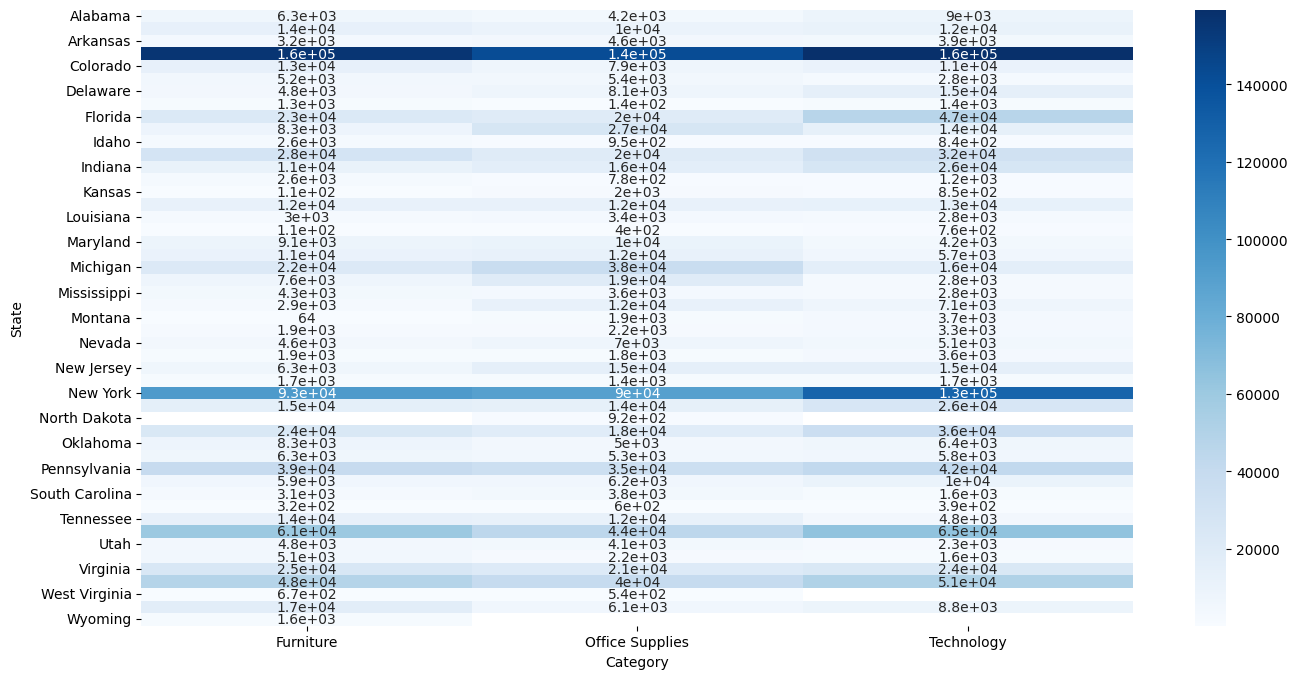

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(data, annot=True, cmap='Blues')